## Series de tiempos

### Descomposición estacional de las series de tiempo

Se realiza la descomposición estacional aditiva de las series temporales de `el_power` para cada conjunto de datos. La descomposición divide la serie en tres componentes:
- **Tendencia**: Captura la dirección general de los datos a lo largo del tiempo.
- **Estacionalidad**: Captura los patrones repetitivos en intervalos regulares.
- **Residuos**: La variación no explicada por la tendencia o la estacionalidad.


In [2]:
# Importar las librerías necesarias
import pandas as pd
import os
from IPython.display import display

# Ruta a la carpeta donde se encuentran los archivos de entrenamiento
train_folder = '/Users/josejavier-yenifer/Documents/Serie de Tiempo/Bono 1/train'

# Nombres de los archivos CSV
train_files = ['ex_1.csv', 'ex_9.csv', 'ex_20.csv', 'ex_21.csv', 'ex_23.csv', 'ex_24.csv']

# Cargar los archivos CSV en variables con prefijo 'df_' y nombre del archivo (sin .csv)
dfs = []
for file in train_files:
    file_name = file.split('.')[0]  # Eliminar la extensión .csv
    file_path = os.path.join(train_folder, file)
    
    # Crear una variable dinámica con el nombre df_<nombre_archivo>
    globals()[f"df_{file_name}"] = pd.read_csv(file_path)

    # Guardar el DataFrame para mostrar luego
    dfs.append((file_name, globals()[f"df_{file_name}"]))

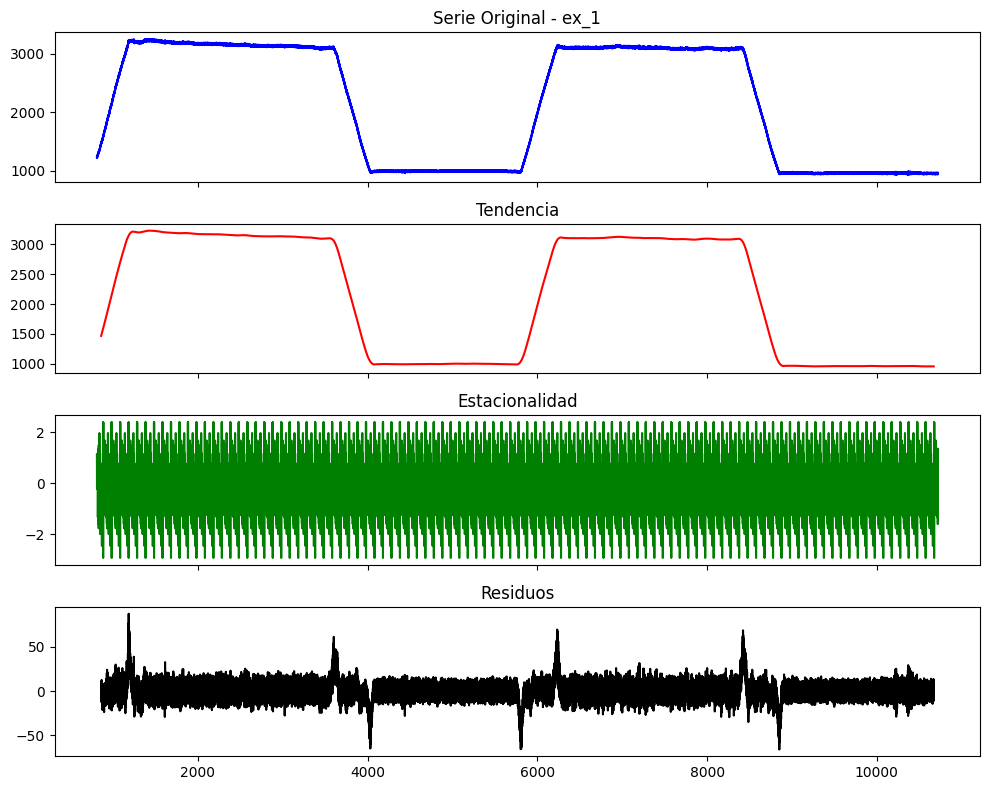

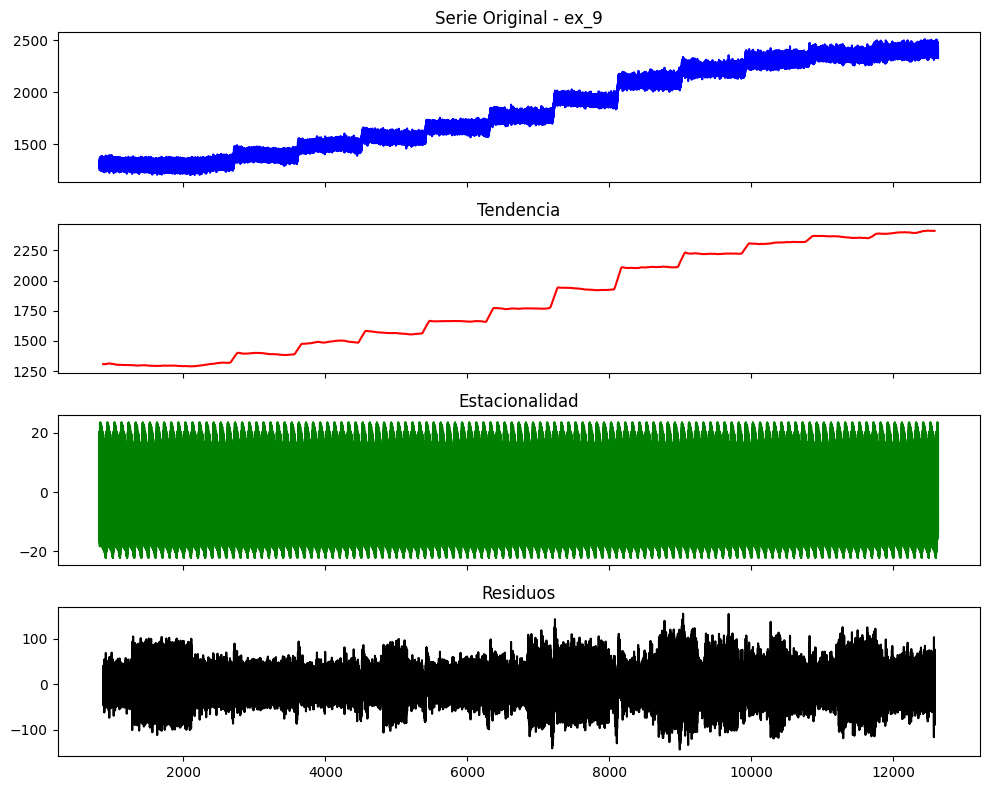

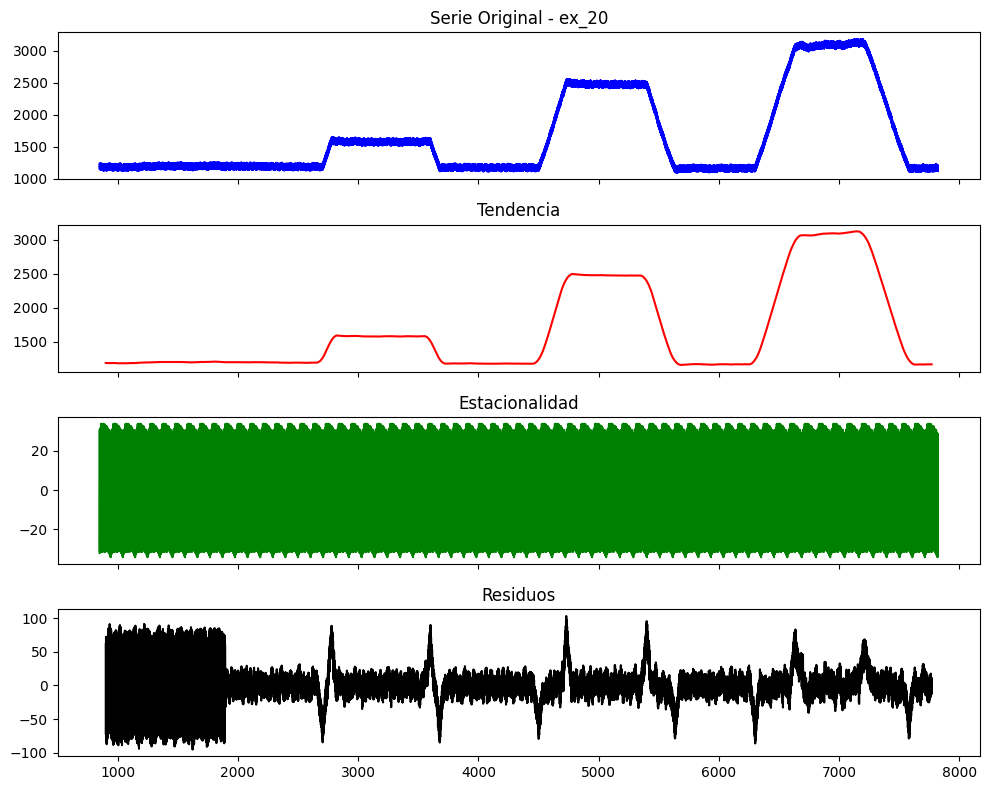

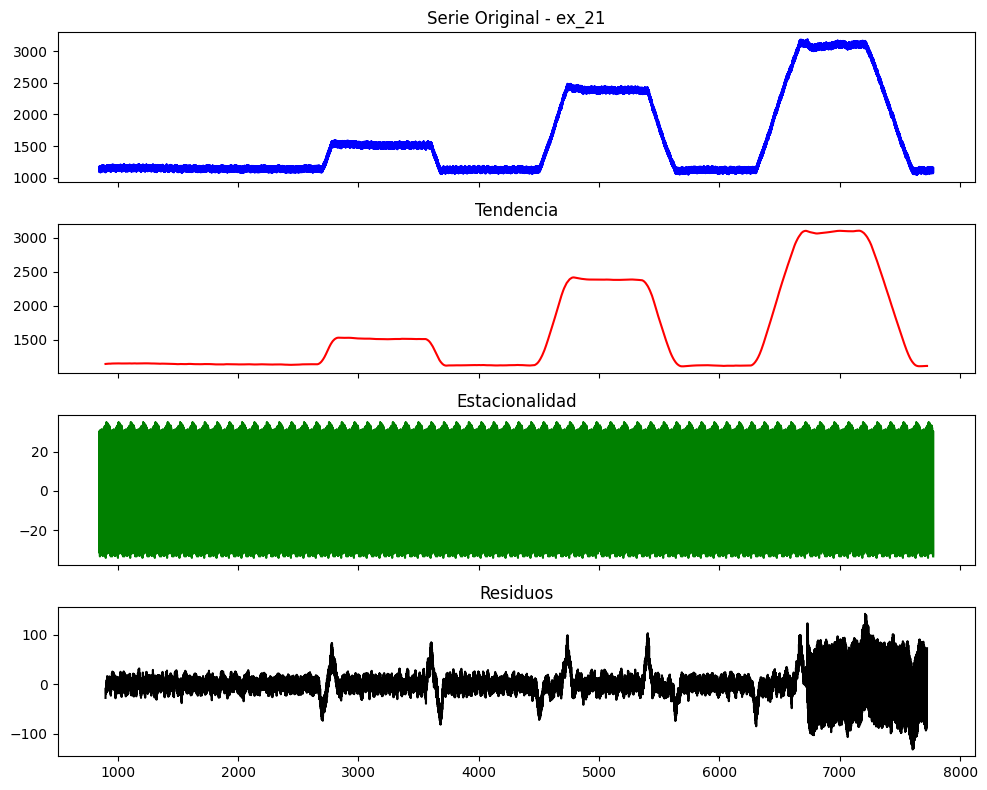

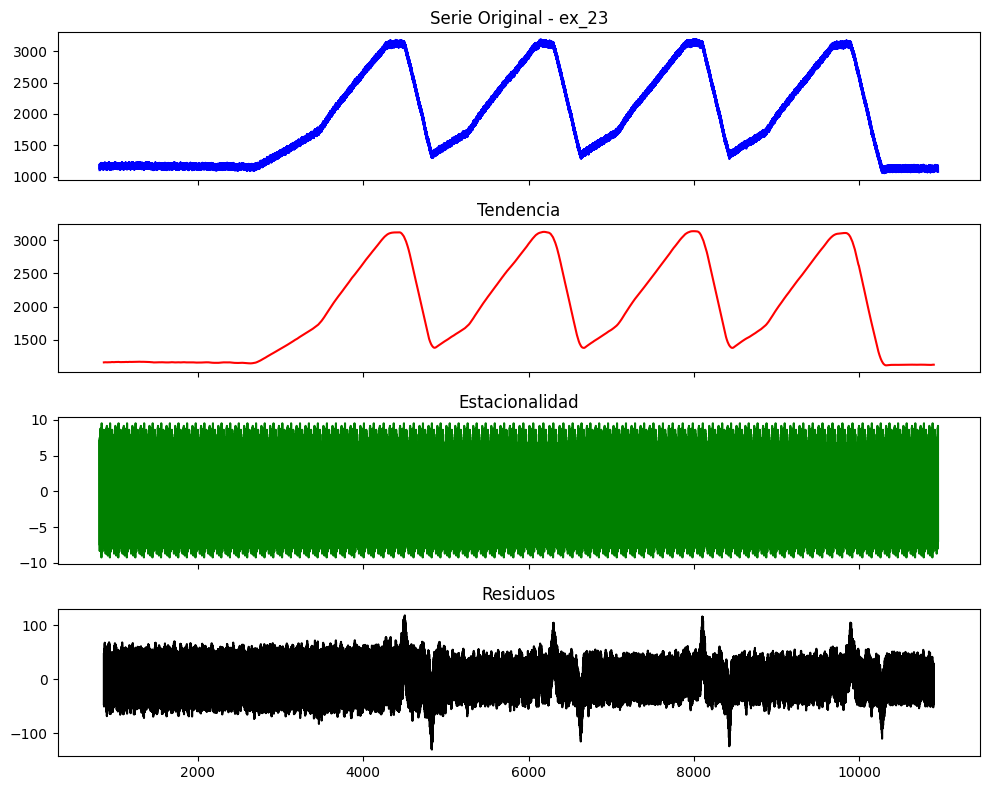

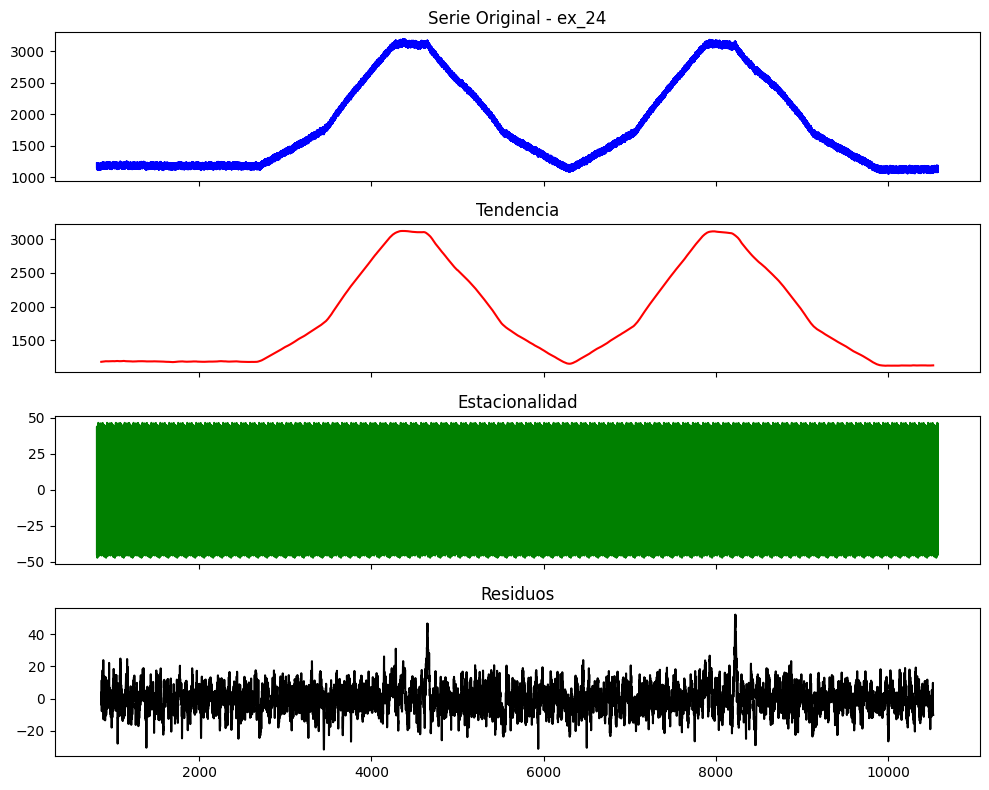

In [3]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Lista de DataFrames y nombres para iterar
dataframes = [df_ex_1, df_ex_9, df_ex_20, df_ex_21, df_ex_23, df_ex_24]
names = ['ex_1', 'ex_9', 'ex_20', 'ex_21', 'ex_23', 'ex_24']

# Periodo estimado, ajusta si es diferente
period = 100

# Iterar sobre los DataFrames para realizar la descomposición estacional
for df, name in zip(dataframes, names):
    # Aplicar la descomposición estacional
    decompose_result = seasonal_decompose(df['el_power'], model='additive', period=period)

    # Crear los subplots
    fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
    
    # Serie original
    axes[0].plot(df['time'], decompose_result.observed, color='blue')
    axes[0].set_title(f'Serie Original - {name}')
    
    # Tendencia
    axes[1].plot(df['time'], decompose_result.trend, color='red')
    axes[1].set_title('Tendencia')
    
    # Estacionalidad
    axes[2].plot(df['time'], decompose_result.seasonal, color='green')
    axes[2].set_title('Estacionalidad')
    
    # Residuos
    axes[3].plot(df['time'], decompose_result.resid, color='black')
    axes[3].set_title('Residuos')
    
    # Ajustar diseño y etiquetas
    plt.tight_layout()
    plt.show()



La descomposición estacional de las series temporales de `el_power` para los diferentes experimentos revela las siguientes características:

- **ex_1**, **ex_20**, y **ex_21** muestran patrones de **tendencia** claros con subidas y bajadas bruscas, reflejando cambios abruptos en la potencia. La **estacionalidad** es constante a lo largo del tiempo, y los **residuos** son relativamente pequeños con algunas fluctuaciones.
- **ex_9** muestra una **tendencia** creciente continua, con una estacionalidad constante y residuos que fluctúan más notablemente, lo que indica variabilidad no explicada.
- **ex_23** y **ex_24** presentan oscilaciones en la **tendencia**, con patrones de estacionalidad constantes y residuos más pronunciados, lo que sugiere ciclos regulares en la potencia eléctrica.



 ### Autocorrelación y Autocorrelación Parcial

Graficamos las funciones de autocorrelación (`ACF`) y autocorrelación parcial (`PACF`) para identificar patrones en las dependencias temporales.

### Evaluación de Estacionariedad

Utilizamos la prueba de `Dickey-Fuller` aumentada (`ADF`) para evaluar si las sseries son estacionaria

In [6]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Lista de DataFrames y nombres para iterar
dataframes = [df_ex_1, df_ex_9, df_ex_20, df_ex_21, df_ex_23, df_ex_24]
names = ['ex_1', 'ex_9', 'ex_20', 'ex_21', 'ex_23', 'ex_24']

# Crear un diccionario para almacenar los resultados
adf_results = {'Estadístico ADF': [], 'Valor p': [], 'Crítico 1%': [], 'Crítico 5%': [], 'Crítico 10%': [], 'Estacionaria': []}

# Iterar sobre los DataFrames para aplicar la prueba ADF
for df in dataframes:
    # Aplicar la prueba ADF a la serie 'el_power'
    result = adfuller(df['el_power'])
    
    # Guardar los resultados en el diccionario
    adf_results['Estadístico ADF'].append(result[0])
    adf_results['Valor p'].append(result[1])
    adf_results['Crítico 1%'].append(result[4]['1%'])
    adf_results['Crítico 5%'].append(result[4]['5%'])
    adf_results['Crítico 10%'].append(result[4]['10%'])
    adf_results['Estacionaria'].append('Sí' if result[1] < 0.05 else 'No')

# Convertir los resultados en un DataFrame para visualización
adf_results_df = pd.DataFrame(adf_results, index=names)

# Mostrar la tabla con los resultados
adf_results_df


Estadístico ADF   Valor p  Crítico 1%  Crítico 5%  Crítico 10%  \
ex_1         -2.880035  0.047719   -3.431012   -2.861833    -2.566926   
ex_9         -0.266266  0.930148   -3.430905   -2.861785    -2.566901   
ex_20        -3.391960  0.011236   -3.431363   -2.861988    -2.567008   
ex_21        -3.451626  0.009320   -3.431363   -2.861988    -2.567008   
ex_23        -4.266146  0.000508   -3.431065   -2.861856    -2.566938   
ex_24        -1.337382  0.611901   -3.431078   -2.861862    -2.566941   

      Estacionaria  
ex_1            Sí  
ex_9            No  
ex_20           Sí  
ex_21           Sí  
ex_23           Sí  
ex_24           No


La tabla muestra los resultados de la prueba de **Dickey-Fuller Aumentada (ADF)** aplicada a las series temporales de `el_power` para evaluar la estacionariedad:

- **ex_1**, **ex_20**, **ex_21**, y **ex_23** presentan valores p menores a 0.05, lo que indica que sus series son **estacionarias** (se rechaza la hipótesis nula de no estacionariedad).
- **ex_9** y **ex_24** tienen valores p mayores a 0.05, lo que sugiere que las series **no son estacionarias** (no se rechaza la hipótesis nula).



## Autocorrelación y Autocorrelación Parcial

Se generaron los gráficos de **autocorrelación (ACF)** y **autocorrelación parcial (PACF)** para las series temporales de `el_power` en los diferentes experimentos:

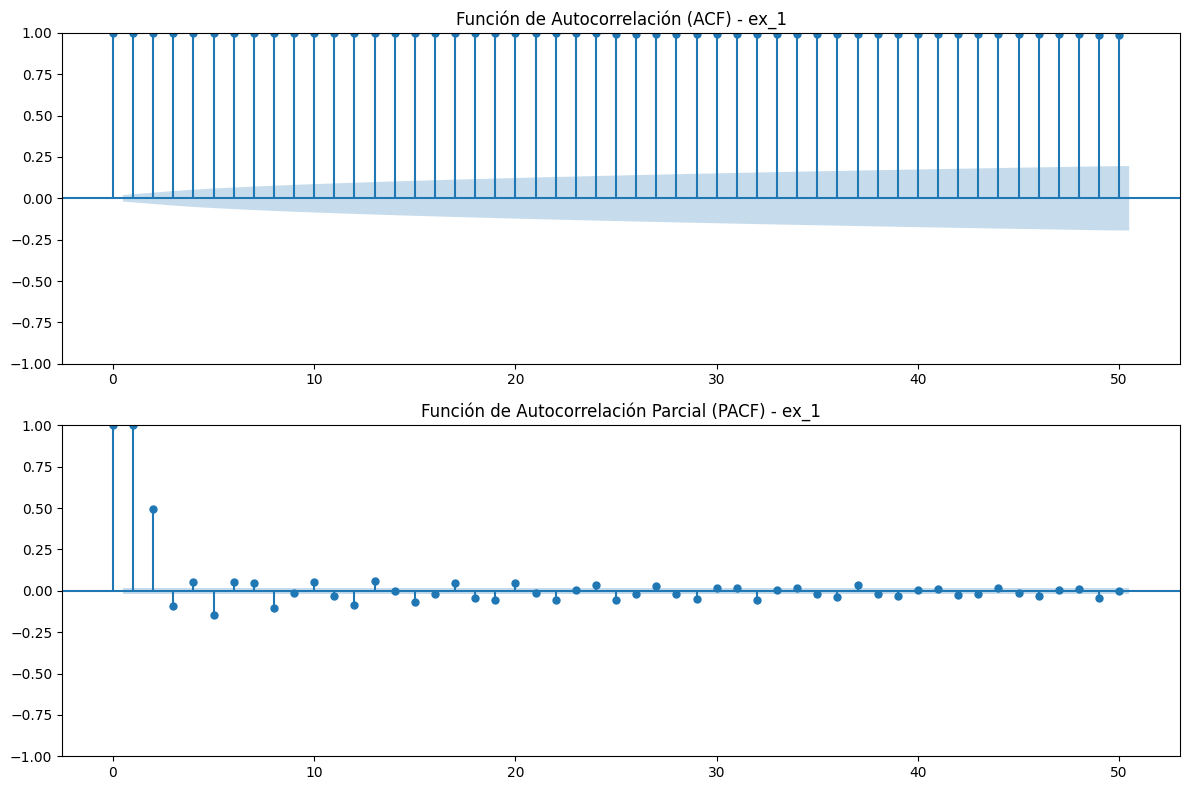

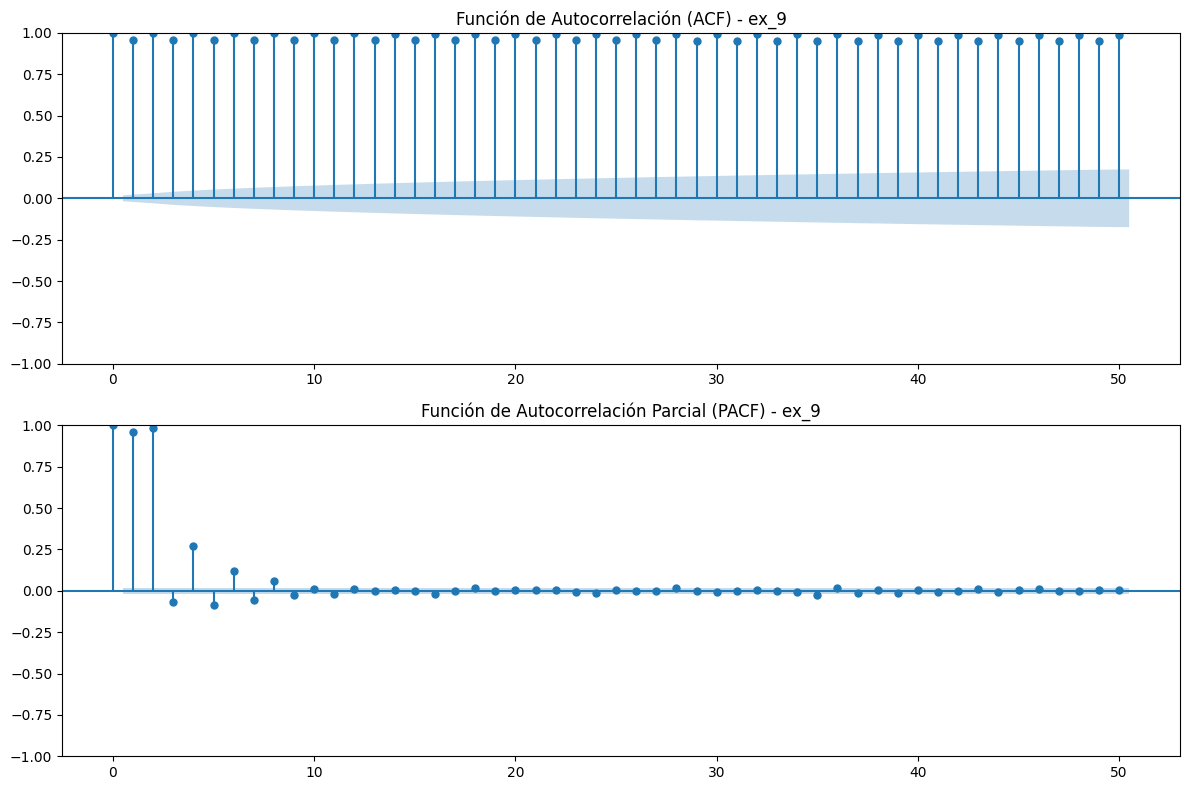

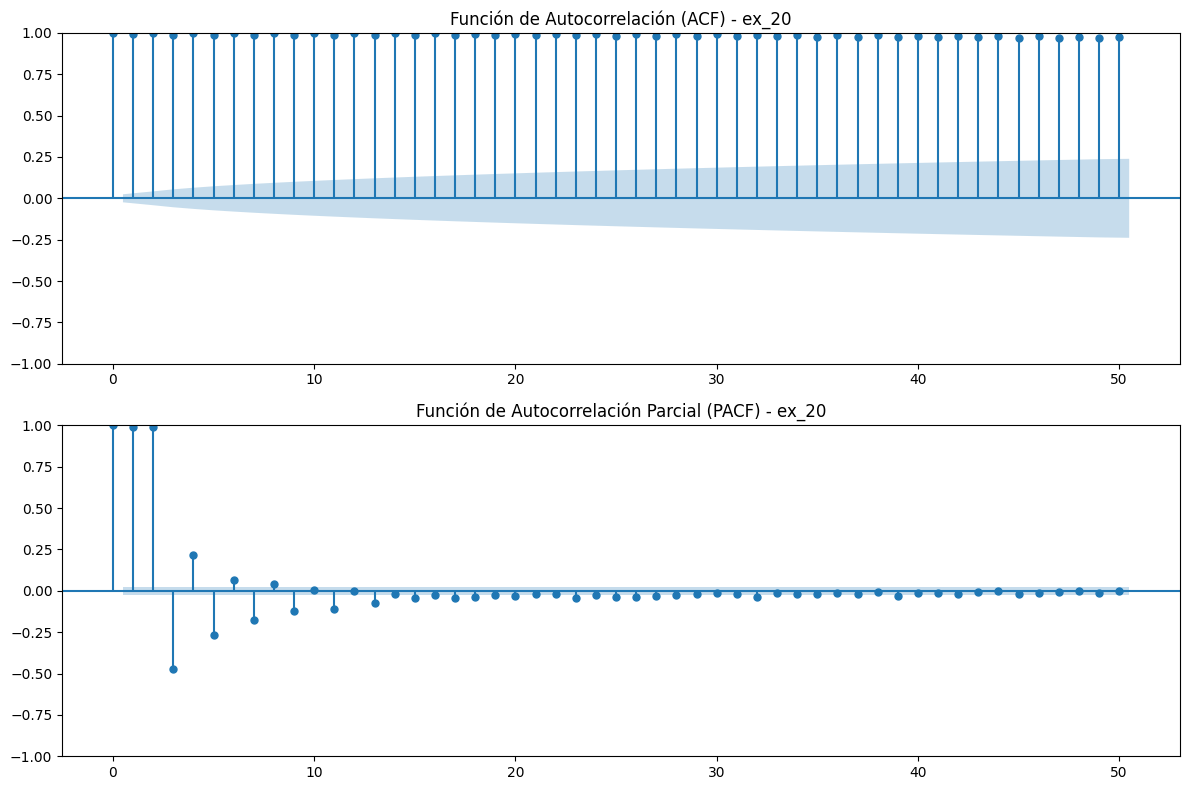

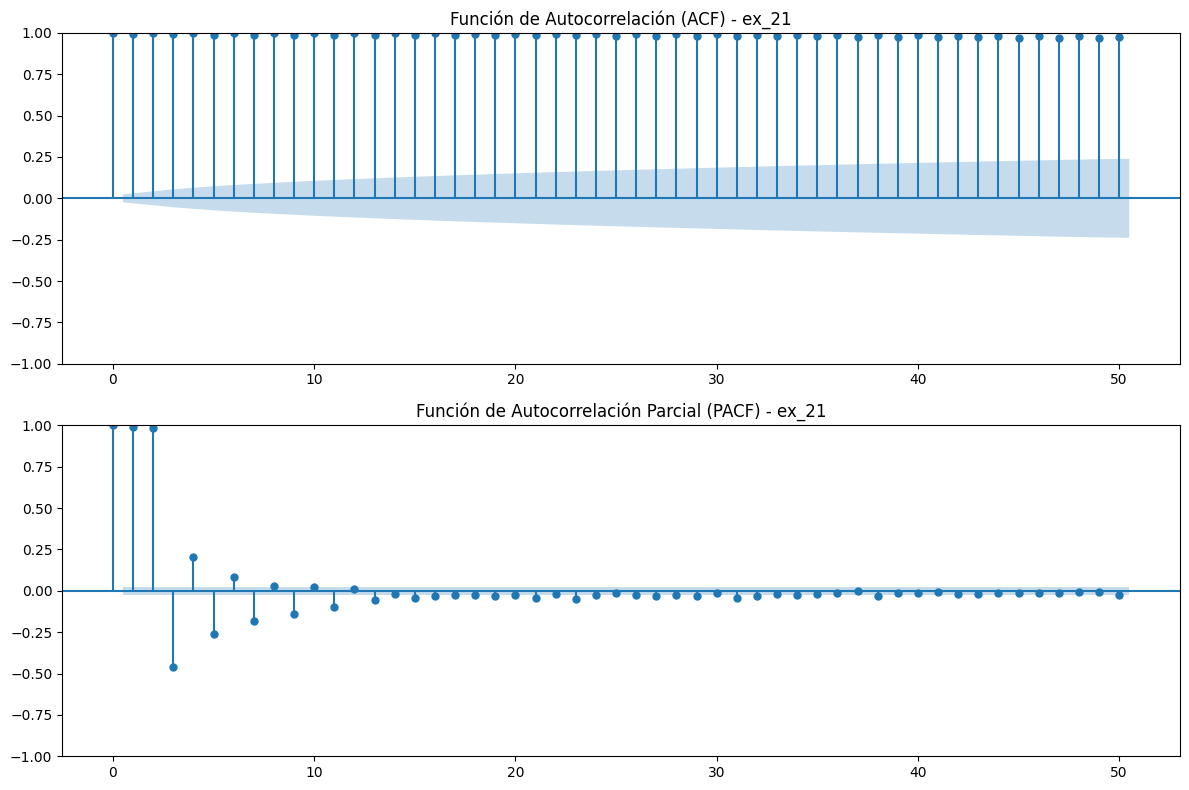

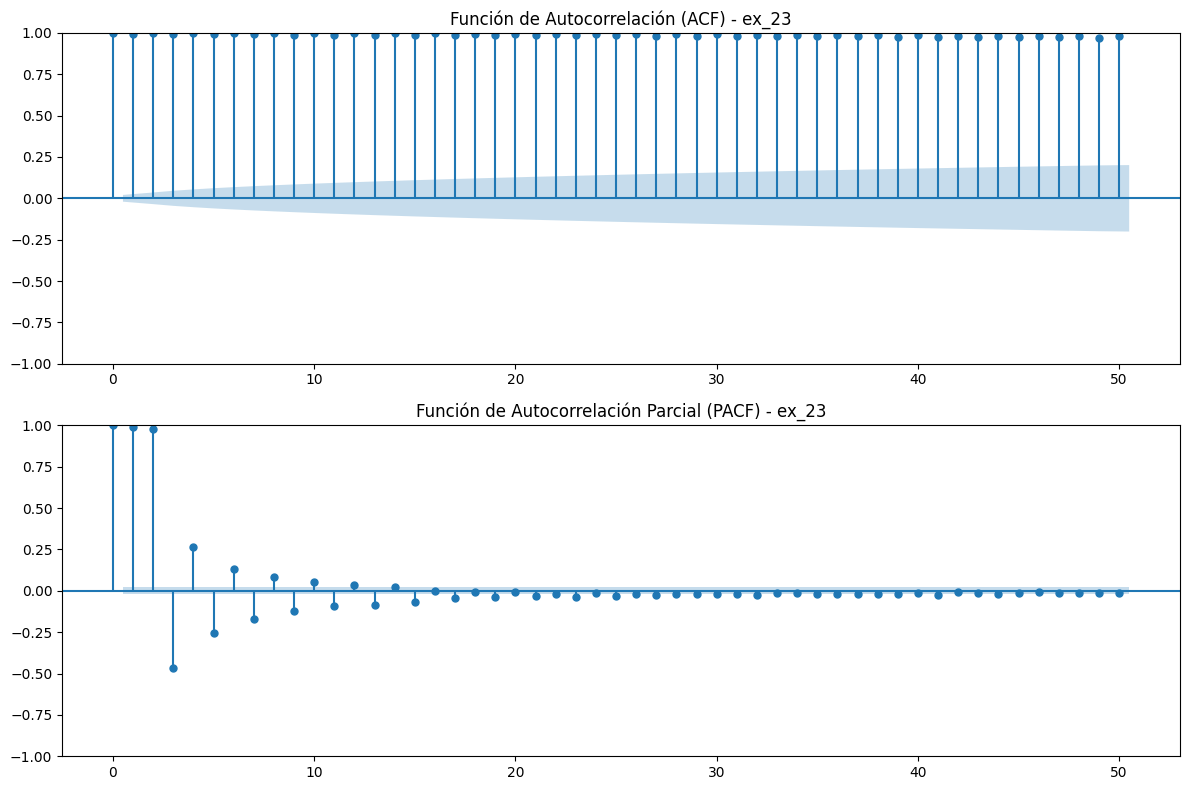

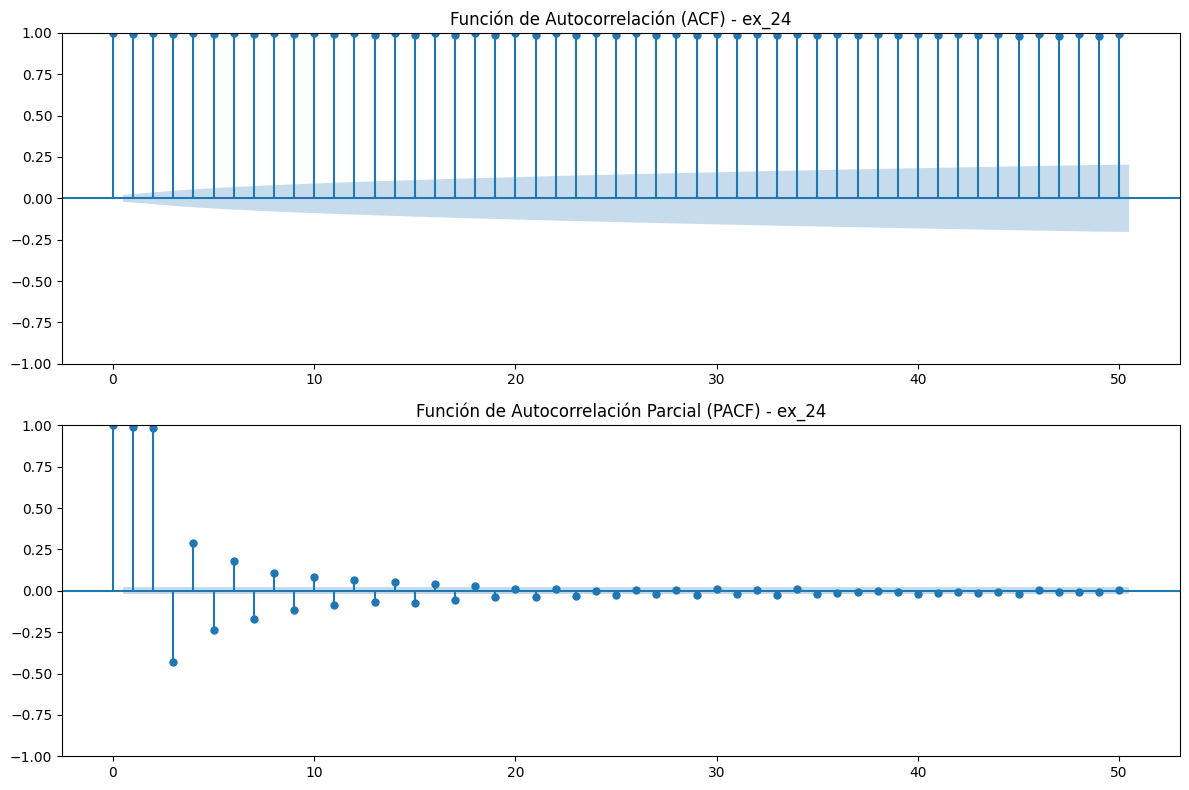

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Lista de DataFrames y nombres para iterar
dataframes = [df_ex_1, df_ex_9, df_ex_20, df_ex_21, df_ex_23, df_ex_24]
names = ['ex_1', 'ex_9', 'ex_20', 'ex_21', 'ex_23', 'ex_24']

# Crear los gráficos de ACF y PACF para cada conjunto de datos
for df, name in zip(dataframes, names):
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))
    
    # ACF
    plot_acf(df['el_power'], lags=50, ax=ax[0])
    ax[0].set_title(f'Función de Autocorrelación (ACF) - {name}')
    
    # PACF
    plot_pacf(df['el_power'], lags=50, ax=ax[1], method='ywm')
    ax[1].set_title(f'Función de Autocorrelación Parcial (PACF) - {name}')
    
    plt.tight_layout()
    plt.show()



- **ex_1**, **ex_9**, **ex_20**, **ex_21**, **ex_23**, y **ex_24** muestran patrones claros en la ACF, con autocorrelaciones significativas a lo largo de muchos retardos. Esto sugiere que las series tienen memoria larga y están fuertemente correlacionadas con sus valores pasados.
  
- En la **PACF**, se observa que solo los primeros retardos muestran una correlación significativa, lo que indica que la dependencia en la serie disminuye rápidamente después de algunos retardos.


### Selección de Modelos


Los resultados obtenidos de las pruebas de **estacionariedad (ADF)**, junto con los gráficos de **ACF** y **PACF**, nos llevan a las siguientes conclusiones:

1. **Prueba ADF (Dickey-Fuller)**: Aunque algunas series temporales como **ex_1**, **ex_20**, **ex_21**, y **ex_23** resultaron estacionarias, otras como **ex_9** y **ex_24** no lo son. Esto implica que un modelo **ARIMA**, que requiere estacionariedad, no es adecuado de manera general para todos los conjuntos de datos, lo que obligaría a aplicar transformaciones adicionales (como la diferenciación) en varias series.

2. **ACF y PACF**: Los gráficos muestran una alta correlación en varios retardos, pero en la **PACF** sólo los primeros retardos son significativos. Esto sugiere que un modelo ARIMA podría funcionar con algunos ajustes en el orden, pero los resultados no son consistentes para todas las series.

Dado que aplicar un modelo ARIMA requeriría transformaciones y ajustes específicos para cada serie, este enfoque resultaría innecesariamente complejo. por lo cual debido a los patrones claros de **tendencia** y **estacionalidad**, se recomienda el uso de técnicas de **suavización simple** y **suavización exponencial** (como `Holt-Winters`). Estas técnicas:

- Capturan tendencias y estacionalidades de manera directa.
- No requieren estacionariedad estricta.
- Son más simples de aplicar y menos sensibles a las fluctuaciones erráticas que se observan en algunas series.


In [11]:
import plotly.graph_objects as go

# Crear una figura 3D
fig = go.Figure()

# Iterar sobre los dataframes y agregar las series al gráfico 3D
for df, name in zip(dataframes, names):
    fig.add_trace(go.Scatter3d(
        x=df['time'],  # Eje X: tiempo
        y=df['input_voltage'],  # Eje Y: voltaje de entrada
        z=df['el_power'],  # Eje Z: potencia eléctrica
        mode='lines',
        name=name
    ))

# Configurar el diseño del gráfico
fig.update_layout(
    title="Visualización 3D de las Series de Tiempo",
    scene=dict(
        xaxis_title='Tiempo',
        yaxis_title='Voltaje de Entrada (V)',
        zaxis_title='Potencia Eléctrica (W)'
    )
)

# Mostrar el gráfico interactivo
fig.show()
